In [1]:
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [2]:
train_df = pd.read_csv('train.csv')[['ID','timestamp','supply(kg)', 'price(원/kg)']]
df = pd.read_csv('train.csv')[['ID','timestamp','supply(kg)', 'price(원/kg)']]
# test_df = pd.read_csv('test.csv')[['ID','timestamp']]

In [3]:
trade_data = pd.read_csv('international_trade.csv')
trade_data

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [4]:
products1 = trade_data[trade_data['품목명'].str.contains('귤')]
products2 = trade_data[trade_data['품목명'].str.contains('브로콜리')]
products3 = trade_data[trade_data['품목명'].str.contains('순무')]
products4 = trade_data[trade_data['품목명'].str.contains('당근')]
products5 = trade_data[trade_data['품목명']=='양배추']

In [5]:
products1 = products1.append(products1.iloc[-1])
products1.iloc[-1,0] = '2023-03'

products2 = products2.append(products2.iloc[-1])
products2.iloc[-1,0] = '2023-03'

products4 = products4.append(products4.iloc[-1])
products4.iloc[-1,0] = '2023-03'

products5 = products5.append(products5.iloc[-1])
products5.iloc[-1,0] = '2023-03'

products5.shape

C:\Users\qrc47\AppData\Local\Temp\ipykernel_15948\2659863341.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  products1 = products1.append(products1.iloc[-1])
C:\Users\qrc47\AppData\Local\Temp\ipykernel_15948\2659863341.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  products2 = products2.append(products2.iloc[-1])
C:\Users\qrc47\AppData\Local\Temp\ipykernel_15948\2659863341.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  products4 = products4.append(products4.iloc[-1])
C:\Users\qrc47\AppData\Local\Temp\ipykernel_15948\2659863341.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  products5 = products5.append(products5.iloc[

(51, 7)

In [ ]:
tmp = []

for i in range(51):
    tmp.append(['무', 0, 0, 0, 0, 0])
tmp = pd.DataFrame(tmp)
tmp.columns = ["품목명", "수출 중량", "수출 금액", "수입 중량", "수입 금액", "무역수지"]

In [ ]:
tmp

In [ ]:
tmp.shape

In [ ]:
products1

In [6]:
from tqdm import tqdm

In [7]:
lists1 = []

for i in tqdm(train_df[train_df['ID'].str.contains("TG")]['timestamp']):
    idx=0
    for j in products1['기간']:
        if j in i:
            lists1.append(products1.iloc[idx, 2:])
            break
        idx+=1
        
lists2 = []

for i in tqdm(train_df[train_df['ID'].str.contains("BC")]['timestamp']):
    idx=0
    for j in products2['기간']:
        if j in i:
            lists2.append(products2.iloc[idx, 2:])
            break
        idx+=1

lists3 = []

for i in tqdm(train_df[train_df['ID'].str.contains("RD")]['timestamp']):
    lists3.append([0,0,0,0,0])

lists4 = []

for i in tqdm(train_df[train_df['ID'].str.contains("CR")]['timestamp']):
    idx=0
    for j in products4['기간']:
        if j in i:
            lists4.append(products4.iloc[idx, 2:])
            break
        idx+=1

lists5 = []

for i in tqdm(train_df[train_df['ID'].str.contains("CB")]['timestamp']):
    idx=0
    for j in products5['기간']:
        if j in i:
            lists5.append(products5.iloc[idx, 2:])
            break
        idx+=1

100%|███████████████████████████████████████████████████████████████████████████| 7615/7615 [00:00<00:00, 11994.80it/s]


In [8]:
class1 = pd.DataFrame(lists1)
class2 = pd.DataFrame(lists2)
class3 = pd.DataFrame(lists3)
class4 = pd.DataFrame(lists4)
class5 = pd.DataFrame(lists5)

In [9]:
products4

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
8,2019-01,당근,23150,22,7466150,2955,-2934
33,2019-02,당근,16250,16,6524716,2600,-2585
56,2019-03,당근,17960,13,13353720,4953,-4941
80,2019-04,당근,16910,14,8323700,3493,-3479
104,2019-05,당근,18000,16,4897803,2160,-2144
130,2019-06,당근,19500,14,7853590,3601,-3587
158,2019-07,당근,17000,11,9570280,3817,-3806
185,2019-08,당근,18547,12,7232500,2690,-2679
212,2019-09,당근,15575,10,10404140,3839,-3829
240,2019-10,당근,17596,11,10531000,3151,-3139


In [10]:
class3.columns = ["수출 중량", "수출 금액", "수입 중량", "수입 금액", "무역수지"]
class3

,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
12179,0,0,0,0,0
12180,0,0,0,0,0
12181,0,0,0,0,0
12182,0,0,0,0,0


In [11]:
c = pd.concat([class1, class2,class3,class4,class5], axis=0)

In [12]:
c.index = range(59397)
c

,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,58368,172,0,0,172
1,58368,172,0,0,172
2,58368,172,0,0,172
3,58368,172,0,0,172
4,58368,172,0,0,172
...,...,...,...,...,...
59392,13188,13,377456,104,-91
59393,13188,13,377456,104,-91
59394,13188,13,377456,104,-91
59395,13188,13,377456,104,-91


In [ ]:
train_df

In [13]:
d = pd.DataFrame([2]*15230 + [4]*13707 + [2]*12184 + [4]*10661 + [4]*7615, columns = ["평균이동"])

In [14]:
df = pd.concat([df, c, d], axis=1)

In [15]:
df['item_id'] = df.ID.str[0:6]
df

,ID,timestamp,supply(kg),price(원/kg),수출 중량,수출 금액,수입 중량,수입 금액,무역수지,평균이동,item_id
0,TG_A_J_20190101,2019-01-01,0.0,0.0,58368,172,0,0,172,2,TG_A_J
1,TG_A_J_20190102,2019-01-02,0.0,0.0,58368,172,0,0,172,2,TG_A_J
2,TG_A_J_20190103,2019-01-03,60601.0,1728.0,58368,172,0,0,172,2,TG_A_J
3,TG_A_J_20190104,2019-01-04,25000.0,1408.0,58368,172,0,0,172,2,TG_A_J
4,TG_A_J_20190105,2019-01-05,32352.0,1250.0,58368,172,0,0,172,2,TG_A_J
...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,452440.0,468.0,13188,13,377456,104,-91,4,RD_F_J
59393,RD_F_J_20230228,2023-02-28,421980.0,531.0,13188,13,377456,104,-91,4,RD_F_J
59394,RD_F_J_20230301,2023-03-01,382980.0,574.0,13188,13,377456,104,-91,4,RD_F_J
59395,RD_F_J_20230302,2023-03-02,477220.0,523.0,13188,13,377456,104,-91,4,RD_F_J


In [16]:
df['수입 금액'] = df['수입 금액'].astype(float)
df['평균이동'] = df['평균이동'].astype(float)
df['수출 중량'] = df['수출 중량'].astype(float)
df['수출 금액'] = df['수출 금액'].astype(float)
df['수입 중량'] = df['수입 중량'].astype(float)
df['무역수지'] = df['무역수지'].astype(float)

In [17]:
data = TimeSeriesDataFrame(df.drop(columns=['ID']))
predictor = TimeSeriesPredictor( 
    prediction_length=28,
    target="price(원/kg)",
    eval_metric="RMSE",
)
# seed 고정
predictor.fit(data, random_seed=312, excluded_model_types=["Naive", "TemporalFusionTransformer", 'PatchTST'],presets="best_quality")

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'RMSE',
 'excluded_model_types': ['Naive', 'TemporalFusionTransformer', 'PatchTST'],
 'hyperparameter_tune_kwargs': {'num_trials': 3,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'best_quality',
 'num_val_windows': 1,
 'prediction_length': 28,
 'random_seed': 312,
 'target': 'price(원/kg)',
 'time_limit': None,
 'verbosity': 2}
Provided training data set with 59397 rows, 39 items (item = single time series). Average time series length is 1523.0. Data frequency is 'D'.
Global seed set to 312
AutoGluon will save models to AutogluonModels\ag-20231119_174651\
AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported 

  0%|          | 0/3 [00:00<?, ?it/s]

	Trained 3 models while tuning DeepAR.
	-764.7127     = Validation score (-RMSE)
	5848.88 s     = Total tuning time
Hyperparameter tuning model: DirectTabular. 
	-756.9480     = Validation score (-RMSE)
	26.44   s     = Training runtime
	2.50    s     = Validation (prediction) runtime
Hyperparameter tuning model: AutoARIMA. 
	-846.5085     = Validation score (-RMSE)
	0.11    s     = Training runtime
	162.76  s     = Validation (prediction) runtime
Fitting simple weighted ensemble.
	-668.3968     = Validation score (-RMSE)
	3.37    s     = Training runtime
	52.09   s     = Validation (prediction) runtime
Training complete. Models trained: ['SeasonalNaive', 'Theta', 'AutoETS', 'RecursiveTabular', 'DeepAR\\T1', 'DeepAR\\T2', 'DeepAR\\T3', 'DirectTabular', 'AutoARIMA', 'WeightedEnsemble']
Total runtime: 6301.52 s
Best model: WeightedEnsemble
Best model score: -668.3968


In [18]:
predictor.refit_full()

Refitting models via `refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix '_FULL' and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `fit` call.
Fitting model: SeasonalNaive_FULL | Skipping fit via cloning parent ...
Fitting model: Theta_FULL | Skipping fit via cloning parent ...
Fitting model: AutoETS_FULL | Skipping fit via cloning parent ...
Fitting model: RecursiveTabular_FULL
	125.62  s     = Training runtime
Fitting model: DeepAR\T1_FULL | Skipping fit via cloning parent ...
Fitting model: DeepAR\T2_FULL | Skipping fit via cloning parent ...
Fitting model: DeepAR\T3_FULL | Skipping fit via cloning parent ...
Fitting model: DirectTabular_FULL
	28.68   s     = Training runtime
Fitting model: AutoARIMA_FULL | Skipping fit via cloning parent ...
Fitting model: WeightedEnsemble_FULL | Skipping fit via cloning parent ...
Refit complete. Models trained: ['S

{'SeasonalNaive': 'SeasonalNaive_FULL',
 'Theta': 'Theta_FULL',
 'AutoETS': 'AutoETS_FULL',
 'RecursiveTabular': 'RecursiveTabular_FULL',
 'DeepAR\\T1': 'DeepAR\\T1_FULL',
 'DeepAR\\T2': 'DeepAR\\T2_FULL',
 'DeepAR\\T3': 'DeepAR\\T3_FULL',
 'DirectTabular': 'DirectTabular_FULL',
 'AutoARIMA': 'AutoARIMA_FULL',
 'WeightedEnsemble': 'WeightedEnsemble_FULL'}

In [19]:
# seed 고정
pred = predictor.predict(data, random_seed=312, )

Global seed set to 312
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble_FULL


In [ ]:
pred['mean'] = (pred * train_df['price(원/kg)'].std()) + train_df['price(원/kg)'].mean()

In [ ]:
pred

In [ ]:
train_df=pd.read_csv('train.csv')[['ID','timestamp','supply(kg)', 'price(원/kg)']]

In [20]:
submission = pd.read_csv('./sample_submission.csv')
submission['answer'] = pred.reset_index()['mean']
submission.loc[submission['answer'] < 0.0, 'answer'] = 0.0

<Axes: >

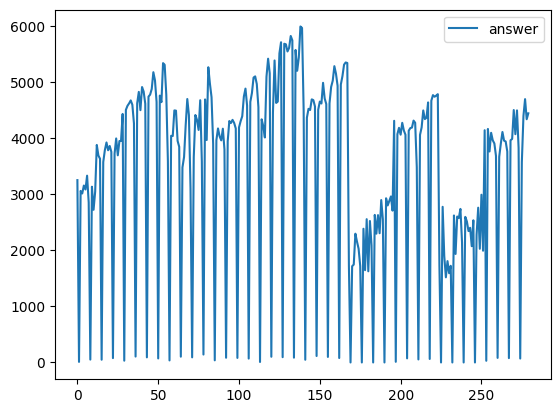

In [21]:
import matplotlib.pyplot as plt

submission[submission["ID"].str.contains('TG')].plot() #300 #300 # 20 # 250 #10

In [22]:
submission[submission["ID"].str.contains('TG')]['answer'] < 300

0      False
1       True
2      False
3      False
4      False
       ...  
275    False
276    False
277    False
278    False
279    False
Name: answer, Length: 280, dtype: bool

In [23]:
submission.loc[submission["ID"].str.contains('TG') & (submission['answer'] < 300), 'answer'] = 0.0
#submission.loc[submission["ID"].str.contains('BC') & (submission['answer'] < 300), 'answer'] = 0.0
#submission.loc[submission["ID"].str.contains('RD') & (submission['answer'] < 20), 'answer'] = 0.0

#submission.loc[submission["ID"].str.contains('CR') & (submission['answer'] < 250), 'answer'] = 0.0
#submission.loc[submission["ID"].str.contains('CB') & (submission['answer'] < 10), 'answer'] = 0.0

In [24]:
submission.to_csv('./dacon_submission-tr30.csv', index=False)
submission

,ID,answer
0,TG_A_J_20230304,3251.376344
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,3058.986619
3,TG_A_J_20230307,3013.488898
4,TG_A_J_20230308,3155.210824
...,...,...
1087,RD_F_J_20230327,481.880960
1088,RD_F_J_20230328,498.496553
1089,RD_F_J_20230329,497.523254
1090,RD_F_J_20230330,487.629317
